# Dataset download
Dataset usado: https://www.kaggle.com/fpeccia/weed-detection-in-soybean-crops

**15336 Total: 9202 train, 3067 valid, 3067 test**
*   3249 soil: 1949 train, 650 valid, 650 test
*   7376 soybean:4426 train, 1475 valid, 1475 test
*   3520 grass: 2112 train, 704 valid, 704 test
*  1191 weed: 715 train, 238 valid,238 test





In [0]:
!pip install -U -q PyDrive
import os
#Allows you to request the Google drive API.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
#Allows you to temporarily load your file in the notebook VM.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Se descarga y unzip 4 carpetas en:  /content/dataset
download = drive.CreateFile({'id': '1EzGmBukP557EExdgANpNRItCSrBvbI_L'})
download.GetContentFile('weed-detection-in-soybean-crops.zip')
!unzip weed-detection-in-soybean-crops.zip

     |████████████████████████████████| 993kB 4.0MB/s 
Archive:  weed-detection-in-soybean-crops.zip
   creating: dataset/
   creating: dataset/broadleaf/
  inflating: dataset/broadleaf/1.tif  
  inflating: dataset/broadleaf/10.tif  
  inflating: dataset/broadleaf/100.tif  
  inflating: dataset/broadleaf/1000.tif  
  inflating: dataset/broadleaf/1001.tif  
  inflating: dataset/broadleaf/1002.tif  
  inflating: dataset/broadleaf/1003.tif  
  inflating: dataset/broadleaf/1004.tif  
  inflating: dataset/broadleaf/1005.tif  
  inflating: dataset/broadleaf/1006.tif  
  inflating: dataset/broadleaf/1007.tif  
  inflating: dataset/broadleaf/1008.tif  
  inflating: dataset/broadleaf/1009.tif  
  inflating: dataset/broadleaf/101.tif  
  inflating: dataset/broadleaf/1010.tif  
  inflating: dataset/broadleaf/1011.tif  
  inflating: dataset/broadleaf/1012.tif  
  inflating: dataset/broadleaf/1013.tif  
  inflating: dataset/broadleaf/1014.tif  
  inflating: dataset/broadleaf/1015.tif  
  inflating:

In [0]:
#Creación de directorios

# El directorio donde guardaremos el dataset se lllama "weedandcrops"
base_dir = './weedandcrops'
os.makedirs(base_dir, exist_ok=True)

# Directorio para nuestro train, validation y test
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

#Directorio para training de grass,soil,soybean, weed
train_grass_dir = os.path.join(train_dir, 'grass')
os.makedirs(train_grass_dir, exist_ok=True)

train_soil_dir = os.path.join(train_dir, 'soil')
os.makedirs(train_soil_dir, exist_ok=True)

train_soybean_dir = os.path.join(train_dir, 'soybean')
os.makedirs(train_soybean_dir, exist_ok=True)

train_weed_dir = os.path.join(train_dir, 'weed')
os.makedirs(train_weed_dir, exist_ok=True)

#Directorio para validation de grass,soil,soybean, weed
validation_grass_dir = os.path.join(validation_dir, 'grass')
os.makedirs(validation_grass_dir, exist_ok=True)

validation_soil_dir = os.path.join(validation_dir, 'soil')
os.makedirs(validation_soil_dir, exist_ok=True)

validation_soybean_dir = os.path.join(validation_dir, 'soybean')
os.makedirs(validation_soybean_dir, exist_ok=True)

validation_weed_dir = os.path.join(validation_dir, 'weed')
os.makedirs(validation_weed_dir, exist_ok=True)

#Directorio para test de grass,soil,soybean, weed
test_grass_dir = os.path.join(test_dir, 'grass')
os.makedirs(test_grass_dir, exist_ok=True)

test_soil_dir = os.path.join(test_dir, 'soil')
os.makedirs(test_soil_dir, exist_ok=True)

test_soybean_dir = os.path.join(test_dir, 'soybean')
os.makedirs(test_soybean_dir, exist_ok=True)

test_weed_dir = os.path.join(test_dir, 'weed')
os.makedirs(test_weed_dir, exist_ok=True)

In [0]:
#Copiamos las imágenes a los directorios correspondientes

#This image dataset has 15336 segments, being 3249 of soil, 7376 of soybean, 3520 grass and 1191 of broadleaf weeds.
#60%train, 20% validation, 20%test

#3249 soil: 1949 train, 650 valid, 650 test
#7376 soybean:4426 train, 1475 valid, 1475 test
#3520 grass: 2112 train, 704 valid, 704 test
#1191 weed: 715 train, 238 valid,238 test

#15336 Total: 9202 train, 3067 valid, 3067 test

import shutil

#File original del que vamos a copiar las imágenes
original_dataset_dir_soil = './dataset/soil'
original_dataset_dir_soybean = './dataset/soybean'
original_dataset_dir_grass = './dataset/grass'
original_dataset_dir_weed = './dataset/broadleaf'

####SOIL####
# Copiamos las primeras 1949 imagenes de soil a train_soil_dir
fnames = ['{}.tif'.format(i) for i in range(1,1950)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soil, fname)
    dst = os.path.join(train_soil_dir, fname)
    shutil.copyfile(src, dst)

# Las siguientes 650 a validation_soil_dir
fnames = ['{}.tif'.format(i) for i in range(1950, 2600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soil, fname)
    dst = os.path.join(validation_soil_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiamos las siguientes 650 a test_soil_dir
fnames = ['{}.tif'.format(i) for i in range(2600, 3250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soil, fname)
    dst = os.path.join(test_soil_dir, fname)
    shutil.copyfile(src, dst)
    
####SOYBEAN####
# Copiamos las primeras 4426 imagenes de soybean a train_soybean_dir
fnames = ['{}.tif'.format(i) for i in range(1,4427)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soybean, fname)
    dst = os.path.join(train_soybean_dir, fname)
    shutil.copyfile(src, dst)

# Las siguientes 1475 a validation_soybean_dir
fnames = ['{}.tif'.format(i) for i in range(4427, 5902)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soybean, fname)
    dst = os.path.join(validation_soybean_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiamos las siguientes 1475 a test_soybean_dir
fnames = ['{}.tif'.format(i) for i in range(5902, 7377)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soybean, fname)
    dst = os.path.join(test_soybean_dir, fname)
    shutil.copyfile(src, dst)
    
####GRASS####
# Copiamos las primeras 2112 imagenes de grass a train_grass_dir
fnames = ['{}.tif'.format(i) for i in range(1,2113)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_grass, fname)
    dst = os.path.join(train_grass_dir, fname)
    shutil.copyfile(src, dst)

# Las siguientes 704 a validation_grass_dir
fnames = ['{}.tif'.format(i) for i in range(2113, 2817)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_grass, fname)
    dst = os.path.join(validation_grass_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiamos las siguientes 704 a test_grass_dir
fnames = ['{}.tif'.format(i) for i in range(2817, 3521)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_grass, fname)
    dst = os.path.join(test_grass_dir, fname)
    shutil.copyfile(src, dst)
    
####WEED####
# Copiamos las primeras 715 imagenes de weed a train_weed_dir
fnames = ['{}.tif'.format(i) for i in range(1,716)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_weed, fname)
    dst = os.path.join(train_weed_dir, fname)
    shutil.copyfile(src, dst)

# Las siguientes 238 a validation_weed_dir
fnames = ['{}.tif'.format(i) for i in range(716, 954)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_weed, fname)
    dst = os.path.join(validation_weed_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiamos las siguientes 238 a test_weed_dir
fnames = ['{}.tif'.format(i) for i in range(954, 1192)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_weed, fname)
    dst = os.path.join(test_weed_dir, fname)
    shutil.copyfile(src, dst)

# Redes convolucionales

Métodos de regularización: Data augmentation y Dropout

## Modelo

In [0]:
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [0]:
#Definir el modelo
#Droput se usa para generalizar y evitar el overfit

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3))) #(3 canales iniciales*32 nodos*3pix*3pix)+32 bias= 896 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #(32 nodos posteriores*64 nodos*3pix*3pix)+64 bias= 18496 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(64 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 73856 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(128 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 147584 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #7*7*128 del max pooling anterior
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) #(6272 de la capa anterior *512 capa densa)+512 bias = 3211776
model.add(layers.Dense(4, activation='softmax')) #(512 capa anterior*4 capa densa)+4 bias = 2052
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
#Definir función de pérdida y optimizador
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

## Data augmentation and re-escaling

In [0]:
# Este es un modulo con utilidades para preprocesamiento de imagenes
from keras.preprocessing import image

#ImageDataGenerator generates batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
#Rather than performing the operations on your memory, the API is designed to be iterated by the deep learning model fitting process, 
#creating augmented image data for you just-in-time. 
from keras.preprocessing.image import ImageDataGenerator

#>>>>Instanciar ImageDataGenerator para aumentar data de train /255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#>>>>Notemos que la data de validacion no debe ser aumentada. Solo /255

#>>>>Instanciar ImageDataGenerator para /255 la data de test
test_datagen = ImageDataGenerator(rescale=1./255)



####Generar nueva data de train y re-escalar####
#Flow_from_directory: Is useful when the images are placed in there respective label folders. This method will identify classes automatically from the folder name.
train_generator = train_datagen.flow_from_directory(
        # Directorio de train
        train_dir,
        # Reescalamos todas las imagenes a 150x150
        target_size=(150, 150),
        color_mode="rgb",
        #batch_size: No. of images to be yielded from the generator per batch.
        #The number of images within each folder is not required to be divisible by the batch size. 
        #If there were a remainder, if you had 234 images when using a batch size of 10, then the last batch would just be smaller. 
        #It would be a batch of 4 in this case.
        batch_size=92,
        # Ya que usamos como pérdida categorical_crossentropy loss, necesitamos etiquetas tipo categorical.
        class_mode='categorical')

####Re-escalar data de validation####
#Flow_from_directory: Is useful when the images are placed in there respective label folders. This method will identify classes automatically from the folder name.
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

####Re-escalar data de test####
#Flow_from_directory: Is useful when the images are placed in there respective label folders. This method will identify classes automatically from the folder name.
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Found 9202 images belonging to 4 classes.
Found 3067 images belonging to 4 classes.
Found 3067 images belonging to 4 classes.


## Training

In [0]:
#Para definir steps_per_epoch
import math
training_samples =9202
batch_size_training_generator=92
validation_samples =3067
batch_size_validation_generator=31

history = model.fit_generator(
      train_generator,
      ##In each epoch, the ImageDataGenerator applies a transformation on the images you have and use the transformed images for training. 
      #You need to set the steps_per_epoch argument of FIT METHOD to n_samples / batch_size, n_samples is the total number of training data you have (ex:1000 in your case).
      #This way in each epoch, each training sample is augmented only one time and therefore 1000 transformed images will be generated in each epoch.
      # These augmented images are not stored in the memory, they are generated on the fly while training and lost after training
    
      #steps_per_epoch: The steps_per_epoch argument must specify the number of batches of samples comprising one epoch. 
      #For example, if your original dataset has 10,000 images and your batch size is 32, then a reasonable value for steps_per_epoch 
      #when fitting a model on the augmented data might be ceil(10,000/32), or 313 batches. 
      #Debido a que los datos se están generando infinitamente, el código necesita saber cuántas muestras extraer del generador antes de declarar una época
      steps_per_epoch=math.ceil(training_samples/batch_size_training_generator),
      epochs=15,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_samples/batch_size_validation_generator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
101/101 [==============================] - 691s 7s/step - loss: 0.9953 - acc: 0.6166 - val_loss: 0.8584 - val_acc: 0.6945
Epoch 2/15
101/101 [==============================] - 676s 7s/step - loss: 0.6125 - acc: 0.7668 - val_loss: 0.5479 - val_acc: 0.7913
Epoch 3/15
101/101 [==============================] - 675s 7s/step - loss: 0.5183 - acc: 0.7959 - val_loss: 0.6824 - val_acc: 0.7750
Epoch 4/15
101/101 [==============================] - 680s 7s/step - loss: 0.4254 - acc: 0.8399 - val_loss: 3.5827 - val_acc: 0.4578
Epoch 5/15
101/101 [==============================] - 681s 7s/step - loss: 0.3950 - acc: 0.8496 - val_loss: 0.4820 - val_acc: 0.8194
Epoch 6/15
101/101 [==============================] - 679s 7s/step - loss: 0.3311 - acc: 0.8765 - val_loss: 0.3620 - val_acc: 0.8631
Epoch 7/15
101/101 [==============================] - 680s 7s/step - loss: 0.3068 - acc: 0.8887 - val_loss: 0.2218 - val_acc: 0.9217
Epoch 8/15
101/101 [=

In [0]:
#Guardamos el modelo
model.save('model_weedcrops.h5')

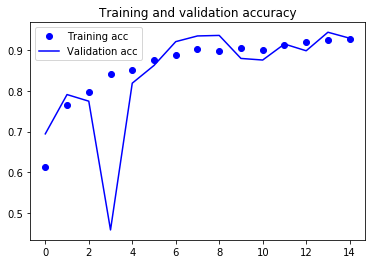

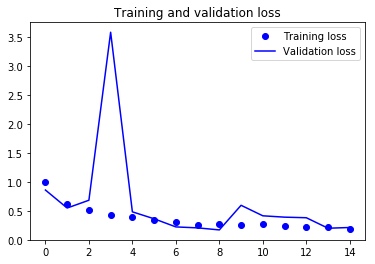

In [0]:
#Análisis de resultado de accy y loss de train y validation
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test

In [0]:
test_samples =3067
batch_size_test=31

score= model.evaluate_generator(test_generator, steps = math.ceil(test_samples/batch_size_test))


In [0]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 93.4%


## Predict

In [0]:
#When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: [1, image_width, image_height, number_of_channels]
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
   np_image = Image.open(filename) #Open the image
   np_image = np.array(np_image).astype('float32')/255 #Creates a numpy array as float and divides by 255.
   np_image = transform.resize(np_image, (150, 150, 3)) #Resize a 150x150 con 3 channels
   # La reescalamos a (1, 150, 150, 3)
   #Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
   np_image = np.expand_dims(np_image, axis=0) #Insert a new axis that will appear at the axis position in the expanded array shape.
   return np_image

#Mostramos los labels
label_map = (test_generator.class_indices)
print (label_map)

#Tomamos una imagen del test. EL label correcto es weed
image_to_predict = load('./weedandcrops/test/weed/1014.tif')
result = model.predict(image_to_predict)
result= np.around(result,decimals=3)
result=result*100
print (result)



{'grass': 0, 'soil': 1, 'soybean': 2, 'weed': 3}
[[ 0.1  0.   0.  99.9]]


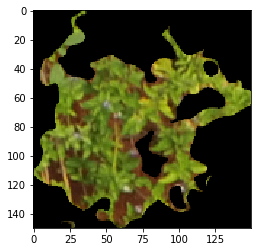

In [0]:
#Transformar la imagen de (1, 150, 150, 3) a (150, 150, 3) y mostrarla
image_to_predict= np.squeeze(image_to_predict,axis=0)
image_to_predict.shape

from matplotlib import pyplot as plt
plt.imshow(image_to_predict, interpolation='nearest')
plt.show()